<a href="https://colab.research.google.com/github/NBZSJ/econComps/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')
# drive.mount('/content/gdrive', force_remount=True)
data = pd.read_csv('/content/gdrive/MyDrive/Seminar Paper/Assets/data5.csv')
oldPop = pd.read_excel('/content/gdrive/MyDrive/Seminar Paper/Assets/oldPopulation.xlsx')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install --upgrade linearmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
pip install stargazer

In [ ]:
pip install pandas tabulate

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import brier_score_loss
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import loguniform
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from tabulate import tabulate
import geopandas as gpd
from scipy import stats


# Preprocessing

In [ ]:
data = data.dropna()
data['Capital'] = data['Capital'].astype(float)
data['Employed'] = data['Employed'].astype(float)
data['GDP'] = data['GDP'].astype(float)
print(data.dtypes)

data.head()

Province            object
City                object
Year                 int64
GDP                float64
Capital            float64
Employed           float64
Pop                float64
College            float64
College Ratio      float64
CPI                float64
Adjusted CPI       float64
Area               float64
Adjusted Area      float64
Developed Areas    float64
dtype: object


<ipython-input-131-3c39b96a100a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Capital'] = data['Capital'].astype(float)
<ipython-input-131-3c39b96a100a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Employed'] = data['Employed'].astype(float)
<ipython-input-131-3c39b96a100a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

,Province,City,Year,GDP,Capital,Employed,Pop,College,College Ratio,CPI,Adjusted CPI,Area,Adjusted Area,Developed Areas
0,Gansu,Longnan,2006,934900.0,302500.0,143.60,261.02,0.3408,0.130565,1.490,101.490000,4683.0,4683.0,6.55
1,Gansu,Longnan,2007,1118100.0,436400.0,145.02,261.44,0.3903,0.149289,5.505,107.077024,4683.0,4683.0,6.57
2,Gansu,Longnan,2008,1216000.0,690398.0,145.80,261.79,0.4418,0.168761,7.860,115.493279,4683.0,4683.0,6.59
3,Yunnan,Zhaotong,2006,1956200.0,929000.0,271.53,511.80,0.3620,0.070731,1.745,101.745000,2240.0,2240.0,16.80
4,Sichuan,Dazhou,2007,5104200.0,2597300.0,280.08,569.32,2.1048,0.369704,5.820,107.819998,451.0,3146.0,20.01


In [ ]:
oldPop = oldPop.dropna()
oldPop['Capital'] = oldPop['Capital'].astype(float)
oldPop['Employed'] = oldPop['Employed'].astype(float)
oldPop['GDP'] = oldPop['GDP'].astype(float)
print(oldPop.dtypes)

columns_to_describe = [col for col in oldPop.columns if col not in ['Year','CPI','Adjusted Area','Test', 'College']]
# Overall summary statistics
print("Overall Summary Statistics:")
print(oldPop[columns_to_describe].describe())
print("Overall Variance Statistics:")
print(oldPop[columns_to_describe].var())
summary_stats = oldPop[columns_to_describe].describe()

# Combine summary and variance oldPop
combined_stats = pd.concat([summary_stats])

# Convert the combined oldPopFrame to LaTeX (or other formats supported by tabulate)
print(tabulate(combined_stats, headers='keys', tablefmt='latex', floatfmt=".2f"))

<ipython-input-7-aeeea671aff6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldPop['Capital'] = oldPop['Capital'].astype(float)
<ipython-input-7-aeeea671aff6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oldPop['Employed'] = oldPop['Employed'].astype(float)
<ipython-input-7-aeeea671aff6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Province            object
City                object
Year                 int64
GDP                float64
Capital            float64
Employed           float64
Pop                float64
College            float64
College Ratio      float64
CPI                float64
Adjusted CPI       float64
Area               float64
Adjusted Area      float64
Test               float64
Developed Areas    float64
OldPop             float64
dtype: object
Overall Summary Statistics:
                GDP       Capital     Employed          Pop  College Ratio  \
count  1.830000e+02  1.830000e+02   183.000000   183.000000     183.000000   
mean   1.986090e+07  1.066756e+07   306.402308   524.060273       1.701366   
std    2.837923e+07  1.224061e+07   246.843671   407.161581       1.867757   
min    1.040300e+06  4.737140e+05    12.600000    23.190000       0.113868   
25%    6.285450e+06  3.784010e+06   144.690000   264.340000       0.569121   
50%    9.212700e+06  6.294256e+06   250.830000   446.10000

In [ ]:
oldPop['Real GDP Per Capita'] = (oldPop['GDP'] / oldPop['Pop']) / (oldPop['Adjusted CPI'] /100)
oldPop['Real Labor Prod'] = (oldPop['GDP'] / oldPop['Employed']) / (oldPop['Adjusted CPI'] /100)
oldPop['Real FAI'] = (oldPop['Capital'] / oldPop['Employed']) / (oldPop['Adjusted CPI'] / 100)
oldPop['Real Labor Prod'] = oldPop['Real Labor Prod'].replace({0: np.nan})
oldPop['Real FAI'] = oldPop['Real FAI'].replace({0: np.nan})
oldPop['OldPop'] = oldPop['OldPop'].replace({0: np.nan})
oldPop['Labor Prod'] = (oldPop['GDP'] / oldPop['Employed'])
oldPop['GDP Per Capita'] = (oldPop['GDP'] / oldPop['Pop'])
oldPop['FAI'] = (oldPop['Capital'] / oldPop['Employed'])
oldPop['Area'] = oldPop['Area'].replace({0: np.nan})
oldPop['LN Area'] = np.log(oldPop['Area'])
oldPop['LN Developed Area'] = np.log(oldPop['Developed Areas'])
oldPop['LN Labor Prod'] = np.log(oldPop['Real Labor Prod'])
oldPop['LN GDP Per Capita'] = np.log(oldPop['GDP Per Capita'])
oldPop['LN Real GDP Per Capita'] = np.log(oldPop['Real GDP Per Capita'])
oldPop['LN FAI'] = np.log(oldPop['Real FAI'])
oldPop['College Ratio'] = oldPop['College Ratio'].replace({0: np.nan})
oldPop['Pop Per Area'] = (oldPop['Pop'] / oldPop['Area'])
oldPop['Pop Per Adjusted Area'] = (oldPop['Pop'] / oldPop['Adjusted Area'])
oldPop['Pop Per Developed Area'] = (oldPop['Pop'] / oldPop['Developed Areas'])
oldPop['LN Real GDP Per Capita'] = np.log(oldPop['Real GDP Per Capita'])
oldPop['LN Real Labor Prod'] = np.log(oldPop['Real Labor Prod'])
oldPop['LN Real FAI'] = np.log(oldPop['Real FAI'])
oldPop['LN Pop'] = np.log(oldPop['Pop'])
oldPop['LN OldPop'] = np.log(oldPop['OldPop'])
oldPop['LN Pop Per Area'] = np.log(oldPop['Pop Per Area'])
oldPop['LN Pop Per Adjusted Area'] = np.log(oldPop['Pop Per Adjusted Area'])
oldPop['LN Pop Per Developed Area'] = np.log(oldPop['Pop Per Developed Area'])
oldPop['LN College Ratio'] = np.log(oldPop['College Ratio'])

In [ ]:
columns_to_describe = [col for col in data.columns if col not in ['Year','CPI','Adjusted Area']]
# Overall summary statistics
print("Overall Summary Statistics:")
print(data[columns_to_describe].describe())
print("Overall Variance Statistics:")
print(data[columns_to_describe].var())
summary_stats = data[columns_to_describe].describe()

# Combine summary and variance data
combined_stats = pd.concat([summary_stats])

# Convert the combined DataFrame to LaTeX (or other formats supported by tabulate)
print(tabulate(combined_stats, headers='keys', tablefmt='latex', floatfmt=".2f"))

Overall Summary Statistics:
                GDP       Capital     Employed          Pop      College  \
count  3.690000e+03  3.690000e+03  3690.000000  3690.000000  3690.000000   
mean   2.199308e+07  1.353087e+07   273.193197   459.716463     9.187882   
std    3.407831e+07  1.770799e+07   221.612579   348.454453    16.035435   
min    5.193000e+05  1.778000e+05     4.500000    19.370000     0.012000   
25%    5.882300e+06  3.799189e+06   135.201975   250.355000     1.524300   
50%    1.160570e+07  8.054585e+06   214.460000   373.170000     3.517500   
75%    2.371875e+07  1.572501e+07   348.000000   574.742500     8.160725   
max    3.896330e+08  2.198441e+08  2143.700000  3209.000000   130.714400   

       College Ratio  Adjusted CPI          Area  Developed Areas  
count    3690.000000   3690.000000   3690.000000      3690.000000  
mean        1.646031    134.858768   2543.121217       139.013290  
std         1.922881     30.439984   3275.859093       193.979092  
min         0.0

<ipython-input-9-898cde818805>:6: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data[columns_to_describe].var())


In [ ]:
datar = data.copy()

In [ ]:
datar['Real GDP Per Capita'] = (datar['GDP'] / datar['Pop']) / (datar['Adjusted CPI'] /100)
datar['Real Labor Prod'] = (datar['GDP'] / datar['Employed']) / (datar['Adjusted CPI'] /100)
datar['Real FAI'] = (datar['Capital'] / datar['Employed']) / (datar['Adjusted CPI'] / 100)
datar['Real Labor Prod'] = datar['Real Labor Prod'].replace({0: np.nan})
datar['Real FAI'] = datar['Real FAI'].replace({0: np.nan})
datar['Labor Prod'] = (datar['GDP'] / datar['Employed'])
datar['GDP Per Capita'] = (datar['GDP'] / datar['Pop'])
datar['FAI'] = (datar['Capital'] / datar['Employed'])
datar['Area'] = datar['Area'].replace({0: np.nan})
datar['LN Area'] = np.log(datar['Area'])
datar['LN Developed Area'] = np.log(datar['Developed Areas'])
datar['LN Labor Prod'] = np.log(datar['Real Labor Prod'])
datar['LN GDP Per Capita'] = np.log(datar['GDP Per Capita'])
datar['LN Real GDP Per Capita'] = np.log(datar['Real GDP Per Capita'])
datar['LN FAI'] = np.log(datar['Real FAI'])
datar['College Ratio'] = datar['College Ratio'].replace({0: np.nan})
datar['Pop Per Area'] = (datar['Pop'] / datar['Area'])
datar['Pop Per Adjusted Area'] = (datar['Pop'] / datar['Adjusted Area'])
datar['Pop Per Developed Area'] = (datar['Pop'] / datar['Developed Areas'])
datar['LN Real GDP Per Capita'] = np.log(datar['Real GDP Per Capita'])
datar['LN Real Labor Prod'] = np.log(datar['Real Labor Prod'])
datar['LN Real FAI'] = np.log(datar['Real FAI'])
datar['LN Pop'] = np.log(datar['Pop'])
datar['LN Pop Per Area'] = np.log(datar['Pop Per Area'])
datar['LN Pop Per Adjusted Area'] = np.log(datar['Pop Per Adjusted Area'])
datar['LN Pop Per Developed Area'] = np.log(datar['Pop Per Developed Area'])
datar['LN College Ratio'] = np.log(datar['College Ratio'])

In [ ]:
oldPopSub = pd.DataFrame(oldPop, columns=['Province', 'City', 'OldPop', 'LN OldPop'])
dataOld = pd.merge(datar, oldPopSub, how='inner', on=['Province', 'City'])

In [ ]:
datar2016 = datar[datar['Year'] == 2016]

In [ ]:
datat = datar.copy()

In [ ]:
def diff_yearly(group):
    group = group.sort_values('Year')

    # Check if the year difference is exactly 1
    year_diff = group['Year'].diff() == 1
    # Apply year-over-year differencing where the year difference is 1
    for col in ['LN Real Labor Prod', 'LN GDP Per Capita','LN Area', 'LN Developed Area','LN Real GDP Per Capita', 'LN Pop','LN Labor Prod', 'LN FAI', 'LN Real FAI', 'LN College Ratio', 'LN Pop Per Area', 'LN Pop Per Adjusted Area', 'LN Pop Per Developed Area']:
        group[f'D {col}'] = group[col].diff()
        group[f'D {col}'][~year_diff] = np.nan  # Set to NaN where year difference is not 1

    return group

datat = datat.groupby(['Province', 'City'], group_keys=False).apply(diff_yearly)
datat.reset_index(drop=True, inplace=True)

dropthese = ['Province', 'City', 'Year', 'D LN Real Labor Prod','LN Area','LN Developed Area','LN GDP Per Capita', 'LN Real GDP Per Capita','D LN Pop', 'D LN Real FAI', 'D LN College Ratio', 'D LN Pop Per Developed Area']
datat = datat.dropna(subset = dropthese)

In [ ]:
def diff_back_two_years(group):
    # Ensure the data is sorted by year within each group
    group = group.sort_values('Year')

    # Initialize columns for the calculated differences with NaN
    cols_to_diff = ['LN Real Labor Prod', 'LN Pop','LN GDP Per Capita','LN Area','LN Developed Area', 'LN Real GDP Per Capita','LN Labor Prod', 'LN FAI', 'LN Real FAI', 'LN College Ratio', 'LN Pop Per Area', 'LN Pop Per Adjusted Area', 'LN Pop Per Developed Area']
    for col in cols_to_diff:
        group[f'DD {col}'] = np.nan

    # Iterate over the DataFrame rows
    for i, row in group.iterrows():
        current_year = row['Year']
        prev_year_row = group[group['Year'] == (current_year - 2)]

        if not prev_year_row.empty:
            for col in cols_to_diff:
                # Calculate the difference: current year value - value from two years ago
                prev_year_value = prev_year_row[col].values[0]
                current_year_value = row[col]
                group.at[i, f'DD {col}'] = current_year_value - prev_year_value

    return group

# Apply the function to each group
datatd = datat.groupby(['Province', 'City'], group_keys=False).apply(diff_back_two_years)

# Reset index after applying the function
datatd.reset_index(drop=True, inplace=True)

# Define columns to check for NaNs before dropping rows
dropthese = ['DD LN Real Labor Prod', 'DD LN Pop', 'DD LN Real FAI','LN Area','LN Developed Area', 'LN Real GDP Per Capita','LN GDP Per Capita','DD LN College Ratio', 'DD LN Pop Per Developed Area']
datatd = datatd.dropna(subset=dropthese, how='any')


In [ ]:
# def diff_yearly_pct_change(group):
#     group = group.sort_values('Year')

#     # Check if the year difference is exactly 1
#     year_diff = group['Year'].diff() == 1

#     # Apply year-over-year percentage change where the year difference is 1
#     for col in ['LN Real Labor Prod', 'LN Pop','LN Labor Prod', 'LN FAI', 'LN Real FAI', 'LN College Ratio', 'LN Pop Per Area', 'LN Pop Per Adjusted Area', 'LN Pop Per Developed Area']:
#         # Calculate percentage change
#         group[f'P {col}'] = group[col].pct_change() * 100  # Multiply by 100 to convert to percentage

#         # Set to NaN where year difference is not 1
#         group.loc[~year_diff, f'P {col}'] = np.nan

#     return group

# # Apply the function
# datat = datat.groupby(['Province', 'City'], group_keys=False).apply(diff_yearly_pct_change)

# # Reset index after applying the function
# datat.reset_index(drop=True, inplace=True)

# # Assuming you still want to drop rows based on the new percentage change columns, update the dropthese list
# dropthese = ['Province', 'City', 'Year', 'P LN Real Labor Prod', 'P LN Pop', 'P LN Real FAI', 'P LN College Ratio', 'P LN Pop Per Developed Area']
# datat = datat.dropna(subset=dropthese)


In [ ]:
datat2010 = datat[datat['Year'] == 2010]

In [ ]:
datatno = datat[datat['City'] != 'Karamay']
datatno = datatno[datatno['City'] != 'Ordos']
datatno2020 = datatno[datatno['Year'] !=2020]

Q1 = datatno2020['D LN Real Labor Prod'].quantile(0.25)
Q3 = datatno2020['D LN Real Labor Prod'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

datatno2020 = datatno2020[(datatno2020['D LN Real Labor Prod'] >= lower_bound) & (datatno2020['D LN Real Labor Prod'] <= upper_bound)]

Q1 = datatno2020['D LN Pop'].quantile(0.25)
Q3 = datatno2020['D LN Pop'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

datatno2020 = datatno2020[(datatno2020['D LN Pop'] >= lower_bound) & (datatno2020['D LN Pop'] <= upper_bound)]

In [ ]:
datatdno = datatd[datatd['City'] != 'Karamay']
datatdno = datatdno[datatdno['City'] != 'Ordos']
datatdno2020 = datatdno[datatdno['Year'] !=2020]

Q1 = datatdno2020['DD LN Real Labor Prod'].quantile(0.25)
Q3 = datatdno2020['DD LN Real Labor Prod'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

datatdno2020 = datatdno2020[(datatdno2020['DD LN Real Labor Prod'] >= lower_bound) & (datatdno2020['DD LN Real Labor Prod'] <= upper_bound)]

Q1 = datatdno2020['DD LN Pop'].quantile(0.25)
Q3 = datatdno2020['DD LN Pop'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

datatdno2020 = datatdno2020[(datatdno2020['DD LN Pop'] >= lower_bound) & (datatdno2020['DD LN Pop'] <= upper_bound)]

In [ ]:
datatAnhui = datat[datat['Province'] == 'Anhui'].sort_values(by='Year', ascending=True)

In [ ]:
coastal_provinces = ['Liaoning', 'Hebei', 'Tianjin', 'Shandong', 'Jiangsu', 'Shanghai', 'Zhejiang', 'Fujian', 'Guangdong', 'Guangxi', 'Hainan']
datac = datat[datat['Province'].isin(coastal_provinces)]
datatcno2020 = datac[datac['Year'] != 2020]
datatdc = datatd[datatd['Province'].isin(coastal_provinces)]
datatdcno2020 = datatdc[datatdc['Year'] != 2020]

In [ ]:
munis = ['Shanghai','Beijing','Tianjin','Chongqing']
datac = datat[datat['Province'].isin(munis)]
datamunino2020 = datac[datac['Year'] != 2020]

In [ ]:
ind = ['Zhejiang','Jiangsu','Guandong','Shanxi','Fujian','Chongqing','Shandong','Jiangxi','Anhui','Shaanxi','Ningxia','Liaoning','Henan','Hebei','Qinghai','Inner Mongolia']
datac = datat[datat['Province'].isin(ind)]
dataino2020 = datac[datac['Year'] != 2020]

In [ ]:
datat_GDP = datat.groupby(['Province','City']).agg({'GDP':'sum'}).reset_index()
datat_top100GDP = datat_GDP.sort_values(by='GDP', ascending=False).head(50)
datat_top100GDP = datat_top100GDP[['Province', 'City']]
datat_top100GDP = pd.merge(datat, datat_top100GDP, on=['Province', 'City'], how='inner')

In [ ]:
datat_GDP = datat.groupby(['Province','City']).agg({'GDP':'sum'}).reset_index()
datat_bot100GDP = datat_GDP.sort_values(by='GDP', ascending=True).head(50)
datat_bot100GDP = datat_bot100GDP[['Province', 'City']]
datat_bot100GDP = pd.merge(datat, datat_bot100GDP, on=['Province', 'City'], how='inner')

In [ ]:
datat_College = datat.groupby(['Province','City']).agg({'College Ratio':'max'}).reset_index()
datat_top100College = datat_College.sort_values(by='College Ratio', ascending=False).head(50)
datat_top100College = datat_top100College[['Province', 'City']]
datat_top100College = pd.merge(datat, datat_top100College, on=['Province', 'City'], how='inner')

In [ ]:
datat_Pop = datat.groupby(['Province','City']).agg({'Pop':'max'}).reset_index()
datat_top100Pop = datat_Pop.sort_values(by='Pop', ascending=False).head(50)
datat_top100Pop = datat_top100Pop[['Province', 'City']]
datat_top100Pop = pd.merge(datat, datat_top100Pop, on=['Province', 'City'], how='inner')

In [ ]:
datat_dev = datat.groupby(['Province','City']).agg({'Developed Areas':'max'}).reset_index()
datat_top100dev = datat_dev.sort_values(by='Developed Areas', ascending=False).head(50)
datat_top100dev = datat_top100dev[['Province', 'City']]
datat_top100dev = pd.merge(datat, datat_top100dev, on=['Province', 'City'], how='inner')

In [ ]:
datar_dev = datar.groupby(['Province','City']).agg({'Developed Areas':'max'}).reset_index()
datar_top100dev = datar_dev.sort_values(by='Developed Areas', ascending=False).head(50)
datar_top100dev = datar_top100dev[['Province', 'City']]
datar_top100dev = pd.merge(datar, datar_top100dev, on=['Province', 'City'], how='inner')

In [ ]:
datat_dev = datat.groupby(['Province','City']).agg({'Developed Areas':'max'}).reset_index()
datat_bot100dev = datat_dev.sort_values(by='Developed Areas', ascending=True).head(50)
datat_bot100dev = datat_bot100dev[['Province', 'City']]
datat_bot100dev = pd.merge(datat, datat_bot100dev, on=['Province', 'City'], how='inner')

In [ ]:
datar_dev = datar.groupby(['Province','City']).agg({'Developed Areas':'max'}).reset_index()
datar_bot100dev = datar_dev.sort_values(by='Developed Areas', ascending=True).head(50)
datar_bot100dev = datar_bot100dev[['Province', 'City']]
datar_bot100dev = pd.merge(datar, datar_bot100dev, on=['Province', 'City'], how='inner')

In [ ]:
datat_prod = datat.groupby(['Province','City']).agg({'Labor Prod':'sum'}).reset_index()
datat_top100prod = datat_prod.sort_values(by='Labor Prod', ascending=False).head(50)
datat_top100prod = datat_top100prod[['Province', 'City']]
datat_top100prod = pd.merge(datat, datat_top100prod, on=['Province', 'City'], how='inner')

In [ ]:
datat_DProd = datat.groupby(['Province','City']).agg({'D LN Real Labor Prod':'sum'}).reset_index()
datat_top50dprod = datat_DProd.sort_values(by='D LN Real Labor Prod', ascending=False).head(50)
datat_top50dprod = datat_top50dprod[['Province', 'City']]
datat_top50dprod = pd.merge(datat, datat_top50dprod, on=['Province', 'City'], how='inner')

In [ ]:
datat2010_top100gdp = datat2010.groupby(['Province','City']).agg({'GDP':'max'}).reset_index()
datat2010_top100gdp = datat2010_top100gdp.sort_values(by='GDP', ascending=False).head(50)
datat2010_top100gdp = datat2010_top100gdp[['Province', 'City']]
datat2010_top100gdp = pd.merge(datat2010, datat2010_top100gdp, on=['Province', 'City'], how='inner')

In [ ]:
columns_to_describe = ['LN Real Labor Prod', 'LN Real FAI', 'LN College Ratio', 'LN Pop', 'LN Pop Per Developed Area']
# Overall summary statistics
print("Overall Summary Statistics:")
print(datar[columns_to_describe].describe())
print("Overall Variance Statistics:")
print(datar[columns_to_describe].var())
summary_stats = datar[columns_to_describe].describe()

# Combine summary and variance data
combined_stats = pd.concat([summary_stats])

# Convert the combined DataFrame to LaTeX (or other formats supported by tabulate)
print(tabulate(combined_stats, headers='keys', tablefmt='latex', floatfmt=".2f"))

Overall Summary Statistics:
       LN Real Labor Prod  LN Real FAI  LN College Ratio       LN Pop  \
count         3690.000000  3690.000000       3690.000000  3690.000000   
mean            10.676759    10.227878         -0.021643     5.899247   
std              0.717522     0.801807          1.058402     0.704625   
min              7.598203     6.996043         -5.555798     2.963725   
25%             10.204597     9.749917         -0.675685     5.522880   
50%             10.691962    10.319725         -0.031006     5.922034   
75%             11.176499    10.763337          0.611611     6.353922   
max             13.558073    12.704716          2.546651     8.073715   

       LN Pop Per Developed Area  
count                3690.000000  
mean                    1.439327  
std                     0.731168  
min                    -1.060382  
25%                     0.912940  
50%                     1.466152  
75%                     1.976741  
max                     3.685132  

# Regressions

### All three agglomeration metrics

In [ ]:
x = datar[['LN Real FAI', 'LN Pop Per Developed Area', 'LN College Ratio']]
y = datar['LN Real Labor Prod']

x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit().get_robustcov_results('HC2')

x = datar[['LN Real FAI', 'LN Pop Per Adjusted Area', 'LN College Ratio']]
y = datar['LN Real Labor Prod']

x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit().get_robustcov_results('HC2')


x = datar[['LN Real FAI', 'LN Pop', 'LN College Ratio']]
y = datar['LN Real Labor Prod']

x = sm.add_constant(x)
model3 = sm.OLS(y, x).fit().get_robustcov_results('HC2')


stargazer = Stargazer([model1, model2, model3])

stargazer.title("Comparison of Linear Regression Models")
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3'], [1, 1, 1])
stargazer.show_model_numbers(False)
stargazer.significant_digits(3)


print(stargazer.render_latex())

\begin{table}[!htbp] \centering
  \caption{Comparison of Linear Regression Models}
\begin{tabular}{@{\extracolsep{5pt}}lccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{3}{c}{\textit{Dependent variable: LN Real Labor Prod}} \
\cr \cline{2-4}
\\[-1.8ex] & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2} & \multicolumn{1}{c}{Model 3}  \\
\hline \\[-1.8ex]
 LN College Ratio & 0.018$^{**}$ & 0.104$^{***}$ & 0.095$^{***}$ \\
& (0.008) & (0.008) & (0.009) \\
 LN Pop & & & 0.038$^{***}$ \\
& & & (0.012) \\
 LN Pop Per Adjusted Area & & -0.006$^{}$ & \\
& & (0.009) & \\
 LN Pop Per Developed Area & -0.331$^{***}$ & & \\
& (0.014) & & \\
 LN Real FAI & 0.506$^{***}$ & 0.630$^{***}$ & 0.640$^{***}$ \\
& (0.014) & (0.012) & (0.012) \\
 const & 5.974$^{***}$ & 4.221$^{***}$ & 3.910$^{***}$ \\
& (0.161) & (0.121) & (0.157) \\
\hline \\[-1.8ex]
 Observations & 3690 & 3690 & 3690 \\
 $R^2$ & 0.689 & 0.629 & 0.630 \\
 Adjusted $R^2$ & 0.689 & 0.628 & 0.630 \\
 Residual Std. Error & 0.40

### Separate Pop and Dev

In [ ]:
x = datar[['LN Real FAI', 'LN Pop', 'LN Developed Area', 'LN College Ratio']]
y = datar['LN Real Labor Prod']

x = sm.add_constant(x)
mainmodel = sm.OLS(y, x).fit().get_robustcov_results('HC2')
print(mainmodel.summary())

stargazer = Stargazer([mainmodel])

# Configure stargazer as needed, for example:
stargazer.title("Regression Results")
stargazer.custom_columns(['Dependent var: GDP'])
stargazer.significant_digits(3)

# To generate LaTeX code
latex_code = stargazer.render_latex()
print(latex_code)

                            OLS Regression Results                            
Dep. Variable:     LN Real Labor Prod   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     2191.
Date:                Wed, 13 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:28:35   Log-Likelihood:                -1723.4
No. Observations:                3690   AIC:                             3457.
Df Residuals:                    3685   BIC:                             3488.
Df Model:                           4                                         
Covariance Type:                  HC2                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0638      0.16

### After Stationary Test. YoY Differences.

In [ ]:
x = datat[['D LN Real FAI', 'D LN Pop', 'D LN College Ratio']]
y = datat['D LN Real Labor Prod']

x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit().get_robustcov_results('HC2')
print(model1.summary())


x = datat[['D LN Real FAI', 'D LN Pop Per Developed Area', 'D LN College Ratio']]
y = datat['D LN Real Labor Prod']

x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit().get_robustcov_results('HC2')
print(model2.summary())

x = datatcno2020[['D LN Real FAI', 'D LN Pop', 'D LN College Ratio']]
y = datatcno2020['D LN Real Labor Prod']

x = sm.add_constant(x)
model3 = sm.OLS(y, x).fit().get_robustcov_results('HC2')
print(model3.summary())


x = datatno2020[['D LN Real FAI', 'D LN Pop', 'D LN College Ratio']]
y = datatno2020['D LN Real Labor Prod']

x = sm.add_constant(x)
model4 = sm.OLS(y, x).fit().get_robustcov_results('HC2')
print(model4.summary())

stargazer = Stargazer([model1, model2, model3, model4])

stargazer.title("Comparison of Linear Regression Models")
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4'], [1, 1, 1, 1])
stargazer.show_model_numbers(False)
stargazer.significant_digits(3)


print(stargazer.render_latex())

                             OLS Regression Results                             
Dep. Variable:     D LN Real Labor Prod   R-squared:                       0.269
Model:                              OLS   Adj. R-squared:                  0.268
Method:                   Least Squares   F-statistic:                     27.23
Date:                  Wed, 13 Mar 2024   Prob (F-statistic):           2.13e-17
Time:                          14:28:35   Log-Likelihood:                 1799.2
No. Observations:                  3423   AIC:                            -3590.
Df Residuals:                      3419   BIC:                            -3566.
Df Model:                             3                                         
Covariance Type:                    HC2                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [ ]:
x = datatd[['DD LN Real FAI', 'DD LN Pop', 'DD LN College Ratio']]
y = datatd['DD LN Real Labor Prod']

x = sm.add_constant(x)
model1 = sm.OLS(y, x).fit().get_robustcov_results('HC2')
print(model1.summary())


x = datatd[['DD LN Real FAI', 'DD LN Pop Per Developed Area', 'DD LN College Ratio']]
y = datatd['DD LN Real Labor Prod']

x = sm.add_constant(x)
model2 = sm.OLS(y, x).fit().get_robustcov_results('HC2')
print(model2.summary())

x = datatdcno2020[['DD LN Real FAI', 'DD LN Pop', 'DD LN College Ratio']]
y = datatdcno2020['DD LN Real Labor Prod']

x = sm.add_constant(x)
model3 = sm.OLS(y, x).fit().get_robustcov_results('HC2')
print(model3.summary())


x = datatdno2020[['DD LN Real FAI', 'DD LN Pop', 'DD LN College Ratio']]
y = datatdno2020['DD LN Real Labor Prod']

x = sm.add_constant(x)
model4 = sm.OLS(y, x).fit().get_robustcov_results('HC2')
print(model4.summary())

stargazer = Stargazer([model1, model2, model3, model4])

stargazer.title("Comparison of Linear Regression Models")
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4'], [1, 1, 1, 1])
stargazer.show_model_numbers(False)
stargazer.significant_digits(3)


print(stargazer.render_latex())

                              OLS Regression Results                             
Dep. Variable:     DD LN Real Labor Prod   R-squared:                       0.241
Model:                               OLS   Adj. R-squared:                  0.241
Method:                    Least Squares   F-statistic:                     37.02
Date:                   Wed, 13 Mar 2024   Prob (F-statistic):           1.80e-23
Time:                           14:28:36   Log-Likelihood:                 670.38
No. Observations:                   2900   AIC:                            -1333.
Df Residuals:                       2896   BIC:                            -1309.
Df Model:                              3                                         
Covariance Type:                     HC2                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
cons

In [ ]:
dataset_names = [
    'datamunino2020',
    'dataino2020',
    'datat_bot100GDP',
    'datat_top100GDP',
    'datat_top100College',
    'datat_top100Pop',
    'datat_top100dev',
    'datat_bot100dev',
    'datat_top100prod'
]

# Function to perform linear regression
def run_linear_regression(df_name):
    # Assuming `df_name` is the dataframe loaded elsewhere
    df = eval(df_name)
    x = df[['D LN Real FAI', 'D LN Pop', 'D LN College Ratio']]
    y = df['D LN Real Labor Prod']
    x = sm.add_constant(x)  # Adds a constant term to the predictor
    model = sm.OLS(y, x).fit()
    return model

# Dictionary to store regression results
regression_results = {}

# Loop through dataset names, perform regressions, and store results
for name in dataset_names:
    regression_results[name] = run_linear_regression(name)

In [ ]:
models_list = [regression_results[name] for name in dataset_names]

# Create a Stargazer object from the list of models
stargazer = Stargazer(models_list)

# Generate LaTeX code (you can convert or display this in your preferred environment)
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lccccccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{9}{c}{\textit{Dependent variable: D LN Real Labor Prod}} \
\cr \cline{2-10}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) & (9) \\
\hline \\[-1.8ex]
 D LN College Ratio & 0.101$^{}$ & 0.013$^{}$ & -0.015$^{}$ & 0.020$^{}$ & -0.008$^{}$ & 0.015$^{}$ & 0.012$^{}$ & 0.000$^{}$ & 0.062$^{*}$ \\
& (0.290) & (0.017) & (0.021) & (0.036) & (0.034) & (0.033) & (0.036) & (0.016) & (0.037) \\
 D LN Pop & -0.075$^{}$ & -0.048$^{}$ & -0.164$^{}$ & 0.112$^{}$ & -0.013$^{}$ & -0.071$^{}$ & 0.011$^{}$ & -0.324$^{***}$ & 0.072$^{}$ \\
& (0.568) & (0.082) & (0.115) & (0.162) & (0.116) & (0.151) & (0.147) & (0.080) & (0.118) \\
 D LN Real FAI & 0.403$^{***}$ & 0.239$^{***}$ & 0.206$^{***}$ & 0.488$^{***}$ & 0.580$^{***}$ & 0.432$^{***}$ & 0.486$^{***}$ & 0.251$^{***}$ & 0.440$^{***}$ \\
& (0.084) & (0.014) & (0.021) & (0.032) & (0.031) & (0.035) & (0.035) & (0.018

In [ ]:
dataset_names = [
    'datamunino2020',
    'dataino2020',
    'datat_bot100GDP',
    'datat_top100GDP',
    'datat_top100College',
    'datat_top100Pop',
    'datat_top100dev',
    'datat_bot100dev',
    'datat_top100prod'
]

# Function to perform linear regression
def run_linear_regression(df_name):
    # Assuming `df_name` is the dataframe loaded elsewhere
    df = eval(df_name)
    x = df[['D LN Real FAI', 'D LN Pop Per Developed Area', 'D LN College Ratio']]
    y = df['D LN Real Labor Prod']
    x = sm.add_constant(x)  # Adds a constant term to the predictor
    model = sm.OLS(y, x).fit()
    return model

# Dictionary to store regression results
regression_results = {}

# Loop through dataset names, perform regressions, and store results
for name in dataset_names:
    regression_results[name] = run_linear_regression(name)

In [ ]:
models_list = [regression_results[name] for name in dataset_names]

# Create a Stargazer object from the list of models
stargazer = Stargazer(models_list)

# Generate LaTeX code (you can convert or display this in your preferred environment)
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lccccccccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{9}{c}{\textit{Dependent variable: D LN Real Labor Prod}} \
\cr \cline{2-10}
\\[-1.8ex] & (1) & (2) & (3) & (4) & (5) & (6) & (7) & (8) & (9) \\
\hline \\[-1.8ex]
 D LN College Ratio & 0.221$^{}$ & 0.012$^{}$ & -0.012$^{}$ & 0.030$^{}$ & -0.007$^{}$ & 0.019$^{}$ & 0.016$^{}$ & 0.010$^{}$ & 0.048$^{}$ \\
& (0.280) & (0.017) & (0.021) & (0.035) & (0.034) & (0.033) & (0.036) & (0.015) & (0.037) \\
 D LN Pop Per Developed Area & 0.162$^{}$ & -0.142$^{***}$ & -0.090$^{*}$ & -0.100$^{}$ & -0.104$^{}$ & -0.136$^{}$ & -0.080$^{}$ & -0.123$^{***}$ & -0.056$^{}$ \\
& (0.191) & (0.039) & (0.052) & (0.094) & (0.078) & (0.090) & (0.090) & (0.042) & (0.060) \\
 D LN Real FAI & 0.407$^{***}$ & 0.236$^{***}$ & 0.203$^{***}$ & 0.488$^{***}$ & 0.576$^{***}$ & 0.428$^{***}$ & 0.482$^{***}$ & 0.248$^{***}$ & 0.439$^{***}$ \\
& (0.082) & (0.014) & (0.021) & (0.032) & (0.031) & (0

### IV

In [ ]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.gmm import IV2SLS

first_stage = sm.OLS(endog=oldPop['LN Pop Per Developed Area'], exog=sm.add_constant(oldPop[['LN OldPop', 'LN Real FAI', 'LN College Ratio']])).fit(cov_type='HC2')

oldPop['LN Pop Per Area Pred'] = first_stage.predict(sm.add_constant(oldPop[['LN OldPop', 'LN Real FAI', 'LN College Ratio']]))

second_stage = sm.OLS(endog=oldPop['LN Real Labor Prod'], exog=sm.add_constant(oldPop[['LN Pop Per Area Pred', 'LN Real FAI', 'LN College Ratio']])).fit(cov_type='HC2')

print(second_stage.summary())

                            OLS Regression Results                            
Dep. Variable:     LN Real Labor Prod   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     89.83
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.66e-35
Time:                        14:28:36   Log-Likelihood:                -115.98
No. Observations:                 183   AIC:                             240.0
Df Residuals:                     179   BIC:                             252.8
Df Model:                           3                                         
Covariance Type:                  HC2                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.3066 

In [ ]:
first_stage = sm.OLS(endog=oldPop['LN Pop'], exog=sm.add_constant(oldPop[['LN OldPop', 'LN Real FAI', 'LN College Ratio']])).fit(cov_type='HC2')

oldPop['LN_Pop_pred'] = first_stage.predict(sm.add_constant(oldPop[['LN OldPop', 'LN Real FAI', 'LN College Ratio']]))

second_stage = sm.OLS(endog=oldPop['LN Real Labor Prod'], exog=sm.add_constant(oldPop[['LN_Pop_pred', 'LN Real FAI', 'LN College Ratio']])).fit(cov_type='HC2')

print(second_stage.summary())

                            OLS Regression Results                            
Dep. Variable:     LN Real Labor Prod   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     89.83
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.66e-35
Time:                        14:28:36   Log-Likelihood:                -115.98
No. Observations:                 183   AIC:                             240.0
Df Residuals:                     179   BIC:                             252.8
Df Model:                           3                                         
Covariance Type:                  HC2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.0173      1.124  

In [ ]:
endog = oldPop['LN Real Labor Prod']  # Endogenous variable: LN Real Labor Prod
exog = sm.add_constant(oldPop[['LN Real FAI', 'LN College Ratio']])  # Exogenous variables: LN Real FAI, LN College Ratio
instrument = sm.add_constant(oldPop[['LN OldPop', 'LN Real FAI', 'LN College Ratio']])  # Instruments + Exogenous variables not being instrumented
endog_exog = oldPop['LN Pop Per Developed Area']  # The variable being instrumented: LN Pop Per Developed Area

# Correctly specify and fit the IV2SLS model
iv_model = IV2SLS(endog=endog, exog=endog_exog, instrument=instrument).fit()

# Print the summary of the IV model
print(iv_model.summary())

                          IV2SLS Regression Results                           
Dep. Variable:     LN Real Labor Prod   R-squared:                       0.748
Model:                         IV2SLS   Adj. R-squared:                  0.746
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Wed, 13 Mar 2024                                         
Time:                        14:34:34                                         
No. Observations:                 183                                         
Df Residuals:                     182                                         
Df Model:                           1                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
LN Pop Per Developed A

In [ ]:
first_stage = sm.OLS(endog_exog, sm.add_constant(oldPop['LN OldPop'])).fit()
print(first_stage.summary())
#F needs to be greater than 10

                                OLS Regression Results                               
Dep. Variable:     LN Pop Per Developed Area   R-squared:                       0.068
Model:                                   OLS   Adj. R-squared:                  0.063
Method:                        Least Squares   F-statistic:                     13.14
Date:                       Wed, 13 Mar 2024   Prob (F-statistic):           0.000375
Time:                               14:28:37   Log-Likelihood:                -204.60
No. Observations:                        183   AIC:                             413.2
Df Residuals:                            181   BIC:                             419.6
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [ ]:
first_stage = sm.OLS(oldPop['LN Pop'], sm.add_constant(oldPop['LN OldPop'])).fit()
print(first_stage.summary())
#F needs to be greater than 10

                            OLS Regression Results                            
Dep. Variable:                 LN Pop   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     114.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           5.76e-21
Time:                        14:28:37   Log-Likelihood:                -160.84
No. Observations:                 183   AIC:                             325.7
Df Residuals:                     181   BIC:                             332.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3243      0.255     13.028      0.0

In [ ]:
from linearmodels.iv import IVGMM
from linearmodels.iv.data import IVData

dependent = dataOld['LN Real Labor Prod']  # Dependent variable
exog = sm.add_constant(dataOld[['LN Real FAI', 'LN College Ratio']])  # Exogenous regressors with constant
endog = dataOld['LN Pop Per Developed Area']  # Endogenous regressor
instruments = dataOld['LN OldPop']  # Instrument for the endogenous regressor with constant

# Initialize and fit the IVGMM model
iv_gmm = IVGMM(dependent=dependent, exog=exog, endog=endog, instruments=instruments).fit()

# Print the summary of the GMM estimation
print(iv_gmm.summary)

                          IV-GMM Estimation Summary                           
Dep. Variable:     LN Real Labor Prod   R-squared:                      0.6904
Estimator:                     IV-GMM   Adj. R-squared:                 0.6901
No. Observations:                2598   F-statistic:                    4935.2
Date:                Wed, Mar 13 2024   P-value (F-stat)                0.0000
Time:                        14:34:59   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                                     Parameter Estimates                                     
                           Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------
const                         5.5212     0.2700     20.448     0.0000      4.9920     

In [ ]:
dependent = dataOld['LN Real Labor Prod']  # Dependent variable
exog = sm.add_constant(dataOld[['LN Real FAI', 'LN College Ratio']])  # Exogenous regressors with constant
endog = dataOld['LN Pop']  # Endogenous regressor
instruments = dataOld['LN OldPop']  # Instrument for the endogenous regressor with constant

# Initialize and fit the IVGMM model
iv_gmm = IVGMM(dependent=dependent, exog=exog, endog=endog, instruments=instruments).fit()

# Print the summary of the GMM estimation
print(iv_gmm)

                          IV-GMM Estimation Summary                           
Dep. Variable:     LN Real Labor Prod   R-squared:                      0.6106
Estimator:                     IV-GMM   Adj. R-squared:                 0.6102
No. Observations:                2598   F-statistic:                    4647.4
Date:                Wed, Mar 13 2024   P-value (F-stat)                0.0000
Time:                        14:35:21   Distribution:                  chi2(3)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
const                5.0804     0.2435     20.865     0.0000      4.6031      5.5576
LN Real FAI          0.6200 

# Tests

In [ ]:
datap = datar.copy()

In [ ]:
from linearmodels import PanelOLS
from linearmodels.panel import compare
from linearmodels.panel import PanelOLS, RandomEffects, compare
from linearmodels.panel import PooledOLS
import statsmodels.api as sm
# from linearmodels.panel import Panel
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from linearmodels.panel import FirstDifferenceOLS
from statsmodels.sandbox.regression.gmm import GMM
from statsmodels.sandbox.regression.gmm import IV2SLS
import linearmodels.iv.model as lm
from statsmodels.stats.diagnostic import het_breuschpagan

### Hausman

In [ ]:
datap['Province_City'] = datap['Province'] + "_" + datap['City']
datap = datap.set_index(['Province_City', 'Year'], drop=False)

formula = 'Q("LN Real Labor Prod") ~ Q("LN Real FAI") + Q("LN Pop") + Q("LN College Ratio") + EntityEffects + TimeEffects'

mod = PanelOLS.from_formula(formula, data=datap)
fe_res = mod.fit(cov_type='robust')
print(fe_res)

                             PanelOLS Estimation Summary                             
Dep. Variable:     Q('LN Real Labor Prod')   R-squared:                        0.4568
Estimator:                        PanelOLS   R-squared (Between):              0.6845
No. Observations:                     3690   R-squared (Within):               0.7367
Date:                     Wed, Mar 13 2024   R-squared (Overall):              0.6847
Time:                             16:09:58   Log-likelihood                    1594.4
Cov. Estimator:                     Robust                                           
                                             F-statistic:                      956.12
Entities:                              262   P-value                           0.0000
Avg Obs:                            14.084   Distribution:                  F(3,3411)
Min Obs:                            2.0000                                           
Max Obs:                            15.000   F-statist

In [ ]:
mod = RandomEffects.from_formula('Q("LN Real Labor Prod") ~ Q("LN Real FAI") + Q("LN Pop") + Q("LN College Ratio") + EntityEffects + TimeEffects', data=datap)
re_model = mod.fit(cov_type='robust')
print(re_model)

                           RandomEffects Estimation Summary                          
Dep. Variable:     Q('LN Real Labor Prod')   R-squared:                        0.9777
Estimator:                   RandomEffects   R-squared (Between):              0.9960
No. Observations:                     3690   R-squared (Within):               0.7138
Date:                     Wed, Mar 13 2024   R-squared (Overall):              0.9957
Time:                             14:28:39   Log-likelihood                    646.79
Cov. Estimator:                     Robust                                           
                                             F-statistic:                   5.394e+04
Entities:                              262   P-value                           0.0000
Avg Obs:                            14.084   Distribution:                  F(3,3687)
Min Obs:                            2.0000                                           
Max Obs:                            15.000   F-statist

In [ ]:
# Extract coefficients
beta_fe = fe_res.params.values
beta_re = re_model.params.values

# Extract variance-covariance matrix and compute the difference
var_fe = fe_res.cov.values
var_re = re_model.cov.values
diff_var = var_fe - var_re

# Calculate Hausman test statistic
diff_beta = beta_fe - beta_re
hausman_stat = np.dot(np.dot(diff_beta.T, np.linalg.inv(diff_var)), diff_beta)

# Degrees of freedom: number of estimates (excluding intercept)
df = len(beta_fe) - 1

# Compute p-value
p_value = 1 - stats.chi2.cdf(hausman_stat, df)

print(f'Hausman Test Statistic: {hausman_stat}')
print(f'Degrees of Freedom: {df}')
print(f'P-value: {p_value}')

Hausman Test Statistic: 403.5460655120358
Degrees of Freedom: 2
P-value: 0.0


In [ ]:
# The compare function takes fitted models as arguments
hausman_test = compare({'Fixed Effects': fe_res, 'Random Effects': re_model}, precision='tstats')
print(hausman_test)

                                 Model Comparison                                
                                        Fixed Effects              Random Effects
---------------------------------------------------------------------------------
Dep. Variable                 Q('LN Real Labor Prod')     Q('LN Real Labor Prod')
Estimator                                    PanelOLS               RandomEffects
No. Observations                                 3690                        3690
Cov. Est.                                      Robust                      Robust
R-squared                                      0.4568                      0.9777
R-Squared (Within)                             0.7367                      0.7138
R-Squared (Between)                            0.6845                      0.9960
R-Squared (Overall)                            0.6847                      0.9957
F-statistic                                    956.12                   5.394e+04
P-value (F-stat)

In [ ]:
datap['Province_City'] = datap['Province'] + "_" + datap['City']
datap = datap.set_index(['Province_City', 'Year'], drop=False)

formula = 'Q("LN Real Labor Prod") ~ Q("LN Real FAI") + Q("LN Pop Per Developed Area") + Q("LN College Ratio") + EntityEffects + TimeEffects'

mod = PanelOLS.from_formula(formula, data=datap)
fe_res = mod.fit(cov_type='robust')
print(fe_res)
mod = RandomEffects.from_formula('Q("LN Real Labor Prod") ~ Q("LN Real FAI") + Q("LN Pop Per Developed Area") + Q("LN College Ratio") + EntityEffects + TimeEffects', data=datap)
re_model = mod.fit(cov_type='robust')
print(re_model)

                             PanelOLS Estimation Summary                             
Dep. Variable:     Q('LN Real Labor Prod')   R-squared:                        0.4741
Estimator:                        PanelOLS   R-squared (Between):              0.6820
No. Observations:                     3690   R-squared (Within):               0.7617
Date:                     Wed, Mar 13 2024   R-squared (Overall):              0.6823
Time:                             14:28:39   Log-likelihood                    1654.2
Cov. Estimator:                     Robust                                           
                                             F-statistic:                      1025.1
Entities:                              262   P-value                           0.0000
Avg Obs:                            14.084   Distribution:                  F(3,3411)
Min Obs:                            2.0000                                           
Max Obs:                            15.000   F-statist

In [ ]:
# Extract coefficients
beta_fe = fe_res.params.values
beta_re = re_model.params.values

# Extract variance-covariance matrix and compute the difference
var_fe = fe_res.cov.values
var_re = re_model.cov.values
diff_var = var_fe - var_re

# Calculate Hausman test statistic
diff_beta = beta_fe - beta_re
hausman_stat = np.dot(np.dot(diff_beta.T, np.linalg.inv(diff_var)), diff_beta)

# Degrees of freedom: number of estimates (excluding intercept)
df = len(beta_fe) - 1

# Compute p-value
p_value = 1 - stats.chi2.cdf(hausman_stat, df)

print(f'Hausman Test Statistic: {hausman_stat}')
print(f'Degrees of Freedom: {df}')
print(f'P-value: {p_value}')


# The compare function takes fitted models as arguments
hausman_test = compare({'Fixed Effects': fe_res, 'Random Effects': re_model}, precision='tstats')
print(hausman_test)

Hausman Test Statistic: 4937.225817808659
Degrees of Freedom: 2
P-value: 0.0
                                     Model Comparison                                     
                                                 Fixed Effects              Random Effects
------------------------------------------------------------------------------------------
Dep. Variable                          Q('LN Real Labor Prod')     Q('LN Real Labor Prod')
Estimator                                             PanelOLS               RandomEffects
No. Observations                                          3690                        3690
Cov. Est.                                               Robust                      Robust
R-squared                                               0.4741                      0.9563
R-Squared (Within)                                      0.7617                      0.4760
R-Squared (Between)                                     0.6820                      0.9947
R-Squared (Ov

### Augmented DFuller

In [ ]:
from statsmodels.tsa.stattools import adfuller

series = [
    'LN Pop',
    'LN Labor Prod',
    'LN Real FAI',
    'LN Developed Area',
    'LN Pop Per Developed Area',
    'LN College Ratio',
]


def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    adf_test = adfuller(timeseries, autolag='AIC')  # Automatically select the lag that minimizes the AIC
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adf_test[4].items():
        adf_output['Critical Value (%s)' % key] = value
    print(adf_output)

for name in series:
    print(f"Testing: {name}")
    series = datar[name].dropna()
    print(adf_test(series))
    print("\n")

Testing: LN Pop
Results of Augmented Dickey-Fuller Test:
Test Statistic                   -1.172146
p-value                           0.685462
#Lags Used                       29.000000
Number of Observations Used    3660.000000
Critical Value (1%)              -3.432138
Critical Value (5%)              -2.862330
Critical Value (10%)             -2.567191
dtype: float64
None


Testing: LN Labor Prod
Results of Augmented Dickey-Fuller Test:
Test Statistic                   -2.123249
p-value                           0.235269
#Lags Used                       30.000000
Number of Observations Used    3659.000000
Critical Value (1%)              -3.432138
Critical Value (5%)              -2.862330
Critical Value (10%)             -2.567191
dtype: float64
None


Testing: LN Real FAI
Results of Augmented Dickey-Fuller Test:
Test Statistic                   -3.208633
p-value                           0.019490
#Lags Used                       27.000000
Number of Observations Used    3662.000000

In [ ]:
from statsmodels.tsa.stattools import adfuller

series = [
    'D LN Pop',
    'D LN Labor Prod',
    'D LN Real FAI',
    'D LN Developed Area',
    'D LN Pop Per Developed Area',
    'D LN College Ratio',
]


def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    adf_test = adfuller(timeseries, autolag='AIC')  # Automatically select the lag that minimizes the AIC
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adf_test[4].items():
        adf_output['Critical Value (%s)' % key] = value
    print(adf_output)

for name in series:
    print(f"Testing: {name}")
    series = datat[name].dropna()
    print(adf_test(series))
    print("\n")

Testing: D LN Pop
Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.116156e+01
p-value                        2.779752e-20
#Lags Used                     1.300000e+01
Number of Observations Used    3.409000e+03
Critical Value (1%)           -3.432270e+00
Critical Value (5%)           -2.862388e+00
Critical Value (10%)          -2.567222e+00
dtype: float64
None


Testing: D LN Labor Prod
Results of Augmented Dickey-Fuller Test:
Test Statistic                -6.787199e+00
p-value                        2.415245e-09
#Lags Used                     2.900000e+01
Number of Observations Used    3.393000e+03
Critical Value (1%)           -3.432279e+00
Critical Value (5%)           -2.862392e+00
Critical Value (10%)          -2.567224e+00
dtype: float64
None


Testing: D LN Real FAI
Results of Augmented Dickey-Fuller Test:
Test Statistic                -7.461409e+00
p-value                        5.341823e-11
#Lags Used                     2.800000e+01
Number of Observati

In [ ]:
data = [
    {"variable": "LN Pop", "ADF Test": -1.172146, "P-Value": 0.685462, "Critical Value (1%)": -3.432138, "Critical Value (5%)": -2.862330},
    {"variable": "LN Labor Prod", "ADF Test": -2.123249, "P-Value": 0.235269, "Critical Value (1%)": -3.432138, "Critical Value (5%)": -2.862330},
    {"variable": "LN Real FAI", "ADF Test": -3.208633, "P-Value": 0.019490, "Critical Value (1%)": -3.432137, "Critical Value (5%)": -2.862330},
    {"variable": "LN Developed Area", "ADF Test": -2.937596, "P-Value": 0.041147, "Critical Value (1%)": -3.432138, "Critical Value (5%)": -2.862330},
    {"variable": "LN Pop Per Developed Area", "ADF Test": 3.500591, "P-Value": 1.000000, "Critical Value (1%)": -3.432138, "Critical Value (5%)": -2.862330},
    {"variable": "LN College Ratio", "ADF Test": -3.324632, "P-Value": 0.013813, "Critical Value (1%)": -3.432138, "Critical Value (5%)": -2.862330},
    {"variable": "D LN Pop", "ADF Test": -11.16156, "P-Value": 2.779752e-20, "Critical Value (1%)": -3.432270, "Critical Value (5%)": -2.862388, "Test Results": ""},
    {"variable": "D LN Labor Prod", "ADF Test": -6.787199, "P-Value": 2.415245e-09, "Critical Value (1%)": -3.432279, "Critical Value (5%)": -2.862392, "Test Results": ""},
    {"variable": "D LN Real FAI", "ADF Test": -7.461409, "P-Value": 5.341823e-11, "Critical Value (1%)": -3.432278, "Critical Value (5%)": -2.862392, "Test Results": ""},
    {"variable": "D LN Developed Area", "ADF Test": -8.763829, "P-Value": 2.630138e-14, "Critical Value (1%)": -3.432276, "Critical Value (5%)": -2.862391, "Test Results": ""},
    {"variable": "D LN Pop Per Developed Area", "ADF Test": -9.359891, "P-Value": 7.874801e-16, "Critical Value (1%)": -3.432276, "Critical Value (5%)": -2.862391, "Test Results": ""},
    {"variable": "D LN College Ratio", "ADF Test": -67.048890, "P-Value": 0.000000, "Critical Value (1%)": -3.432262, "Critical Value (5%)": -2.862385, "Test Results": ""}
]

# Convert to DataFrame
df = pd.DataFrame(data)

# Step 2: Determine the test result
df['Test Results'] = df.apply(lambda row: "stationary" if row["P-Value"] < 0.05 else "non-stationary", axis=1)

# Step 3: Generate the LaTeX table
latex_table = df.to_latex(index=False, columns=["variable", "ADF Test", "P-Value", "Critical Value (1%)", "Critical Value (5%)", "Test Results"], header=["Variable", "ADF Test", "P-Value", "Critical Value (1%)", "Critical Value (5%)", "Test Results"], float_format="%.4f")

print(latex_table)

\begin{tabular}{lrrrrl}
\toprule
                   Variable & ADF Test & P-Value & Critical Value (1\%) & Critical Value (5\%) &   Test Results \\
\midrule
                     LN Pop &  -1.1721 &  0.6855 &             -3.4321 &             -2.8623 & non-stationary \\
              LN Labor Prod &  -2.1232 &  0.2353 &             -3.4321 &             -2.8623 & non-stationary \\
                LN Real FAI &  -3.2086 &  0.0195 &             -3.4321 &             -2.8623 &     stationary \\
          LN Developed Area &  -2.9376 &  0.0411 &             -3.4321 &             -2.8623 &     stationary \\
  LN Pop Per Developed Area &   3.5006 &  1.0000 &             -3.4321 &             -2.8623 & non-stationary \\
           LN College Ratio &  -3.3246 &  0.0138 &             -3.4321 &             -2.8623 &     stationary \\
                   D LN Pop & -11.1616 &  0.0000 &             -3.4323 &             -2.8624 &     stationary \\
            D LN Labor Prod &  -6.7872 &  0.0000 &  

<ipython-input-58-de4e347e6ffd>:23: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=False, columns=["variable", "ADF Test", "P-Value", "Critical Value (1%)", "Critical Value (5%)", "Test Results"], header=["Variable", "ADF Test", "P-Value", "Critical Value (1%)", "Critical Value (5%)", "Test Results"], float_format="%.4f")


# Visuals

In [ ]:
from scipy.stats import linregress

In [ ]:
datatq = datat.copy()

<ipython-input-108-67d62108c352>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.7, s=100, cmap='navy')


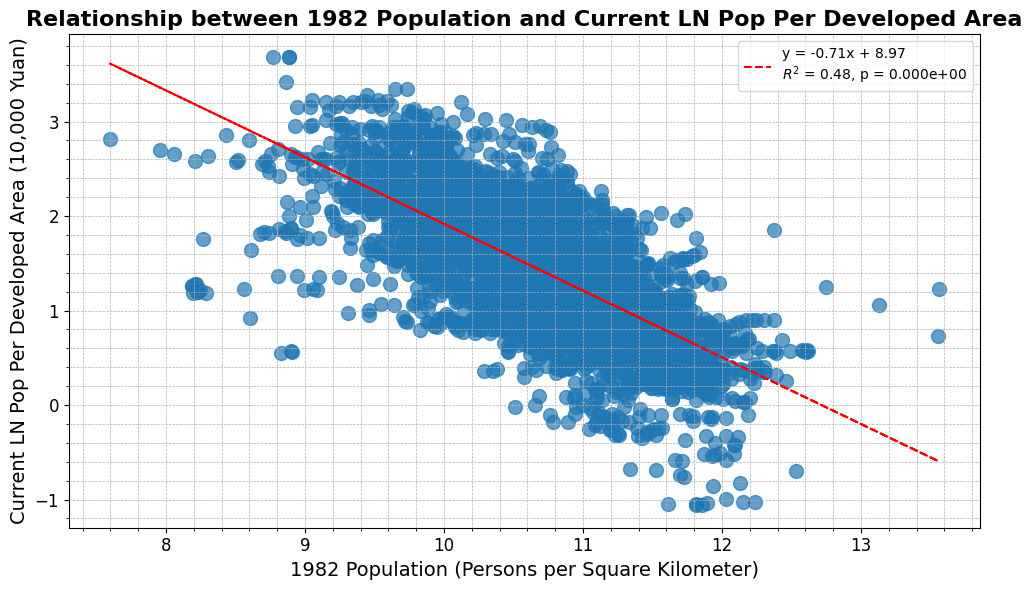

In [ ]:
x_column = 'LN Labor Prod'
y_column = 'LN Pop Per Developed Area'

plt.figure(figsize=(10, 6))

x = datar[x_column]
y = datar[y_column]

plt.scatter(x, y, alpha=0.7, s=100, cmap='navy')

slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line values
line = slope * x + intercept

# Plot the regression line
plt.plot(x, line, 'r--', label=f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}, p = {p_value:.3e}')

# Titles and labels with improved font sizes
plt.title(f'Relationship between 1982 Population and Current {y_column}', fontsize=16, fontweight='bold')
plt.xlabel(f'1982 Population (Persons per Square Kilometer)', fontsize=14)  # Replace 'units' with actual unit
plt.ylabel(f'Current {y_column} (10,000 Yuan)', fontsize=14)  # Replace 'units' with actual unit

# Grid and style adjustments
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12)

# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

<ipython-input-91-351e62016fbd>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, alpha=0.7, s=100, cmap='navy')


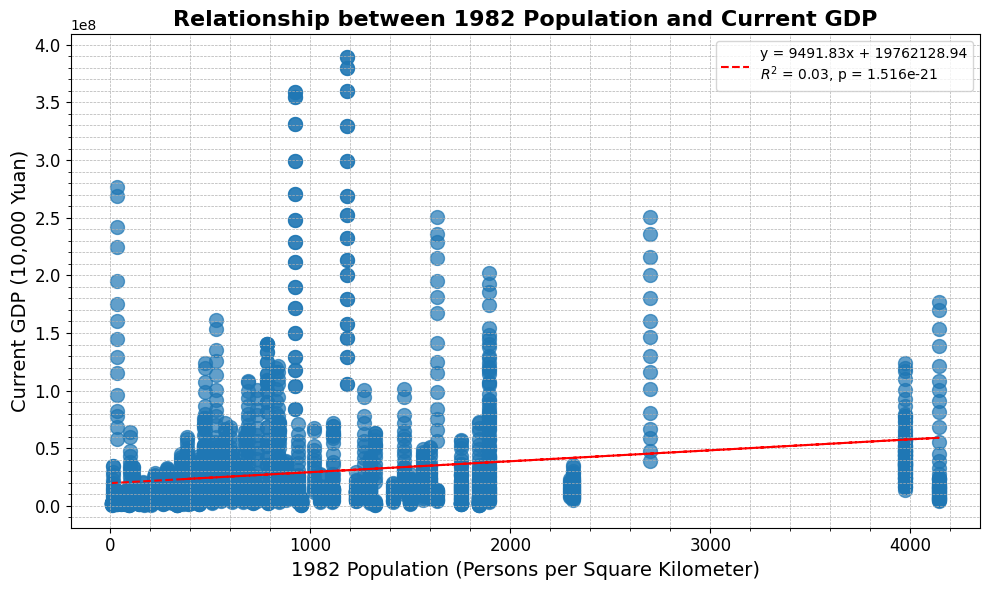

In [ ]:
x_column = 'OldPop'
y_column = 'GDP'

plt.figure(figsize=(10, 6))

x = dataOld[x_column]
y = dataOld[y_column]

plt.scatter(x, y, alpha=0.7, s=100, cmap='navy')

slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate the regression line values
line = slope * x + intercept

# Plot the regression line
plt.plot(x, line, 'r--', label=f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_value**2:.2f}, p = {p_value:.3e}')

# Titles and labels with improved font sizes
plt.title(f'Relationship between 1982 Population and Current {y_column}', fontsize=16, fontweight='bold')
plt.xlabel(f'1982 Population (Persons per Square Kilometer)', fontsize=14)  # Replace 'units' with actual unit
plt.ylabel(f'Current {y_column} (10,000 Yuan)', fontsize=14)  # Replace 'units' with actual unit

# Grid and style adjustments
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12)

# Add the legend
plt.legend()

plt.tight_layout()
plt.show()

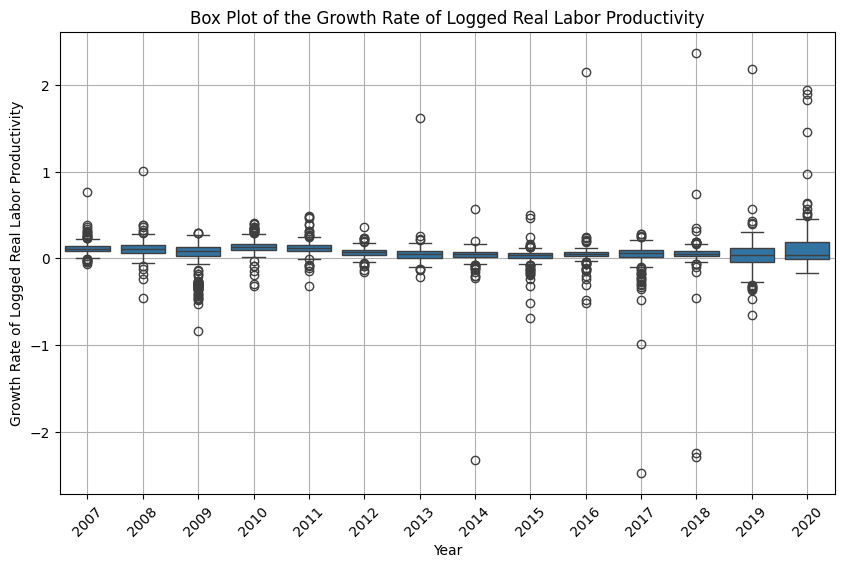

In [ ]:
datatn2020 = datat[datat['Year'] != 2020]

# Setting the figure size
plt.figure(figsize=(10, 6))

# Creating a box plot
sns.boxplot(x='Year', y='D LN Real Labor Prod', data=datat)

# Adding plot title and labels
plt.title('Box Plot of the Growth Rate of Logged Real Labor Productivity')
plt.xlabel('Year')
plt.ylabel('Growth Rate of Logged Real Labor Productivity')

# Showing grid lines
plt.grid(True)

# Displaying the plot
plt.xticks(rotation=45) # This will rotate the x-axis labels to avoid overlap
plt.show()

In [ ]:
datatq = datatq[datatq['Year'] != 2020]
x = datatq[['D LN Real FAI', 'D LN Pop','D LN College Ratio']]
y = datatq['D LN Real Labor Prod']

x_with_const = sm.add_constant(x)
model = sm.OLS(y, x_with_const).fit(cov_type='HC2')
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     D LN Real Labor Prod   R-squared:                       0.209
Model:                              OLS   Adj. R-squared:                  0.208
Method:                   Least Squares   F-statistic:                     14.98
Date:                  Wed, 13 Mar 2024   Prob (F-statistic):           1.11e-09
Time:                          16:08:22   Log-Likelihood:                 1778.5
No. Observations:                  3201   AIC:                            -3549.
Df Residuals:                      3197   BIC:                            -3525.
Df Model:                             3                                         
Covariance Type:                    HC2                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [ ]:
import matplotlib.patches as mpatches
china_map = gpd.read_file('/content/gdrive/MyDrive/Seminar Paper/Assets/gadm41_CHN_1.shp')
china_map2 = gpd.read_file('/content/gdrive/MyDrive/Seminar Paper/Assets/gadm41_CHN_2.shp')

In [ ]:
dataGraph = datar
dataGraph.loc[dataGraph['Province'] == "Inner Mongolia", 'Province'] = "Nei Mongol"
dataGraph.loc[dataGraph['Province'] == "hubei", 'Province'] = "Hubei"
dataGraph.loc[dataGraph['Province'] == "Xinjiang", 'Province'] = "Xinjiang Uygur"
dataGraph.loc[dataGraph['Province'] == "Ningxia", 'Province'] = "Ningxia Hui"
observations_per_province = pd.DataFrame(dataGraph['Province'].value_counts()).reset_index()
observations_per_province.columns = ['Province', 'Count']
observations_per_city = dataGraph.groupby(['Province', 'City']).size().reset_index(name='Count')

In [ ]:
china_map_with_pop = china_map.merge(observations_per_province, how='left', left_on='NAME_1', right_on='Province')
city_map = china_map2.merge(observations_per_city, how = 'left', left_on=['NAME_1', 'NAME_2'], right_on=['Province', 'City'])

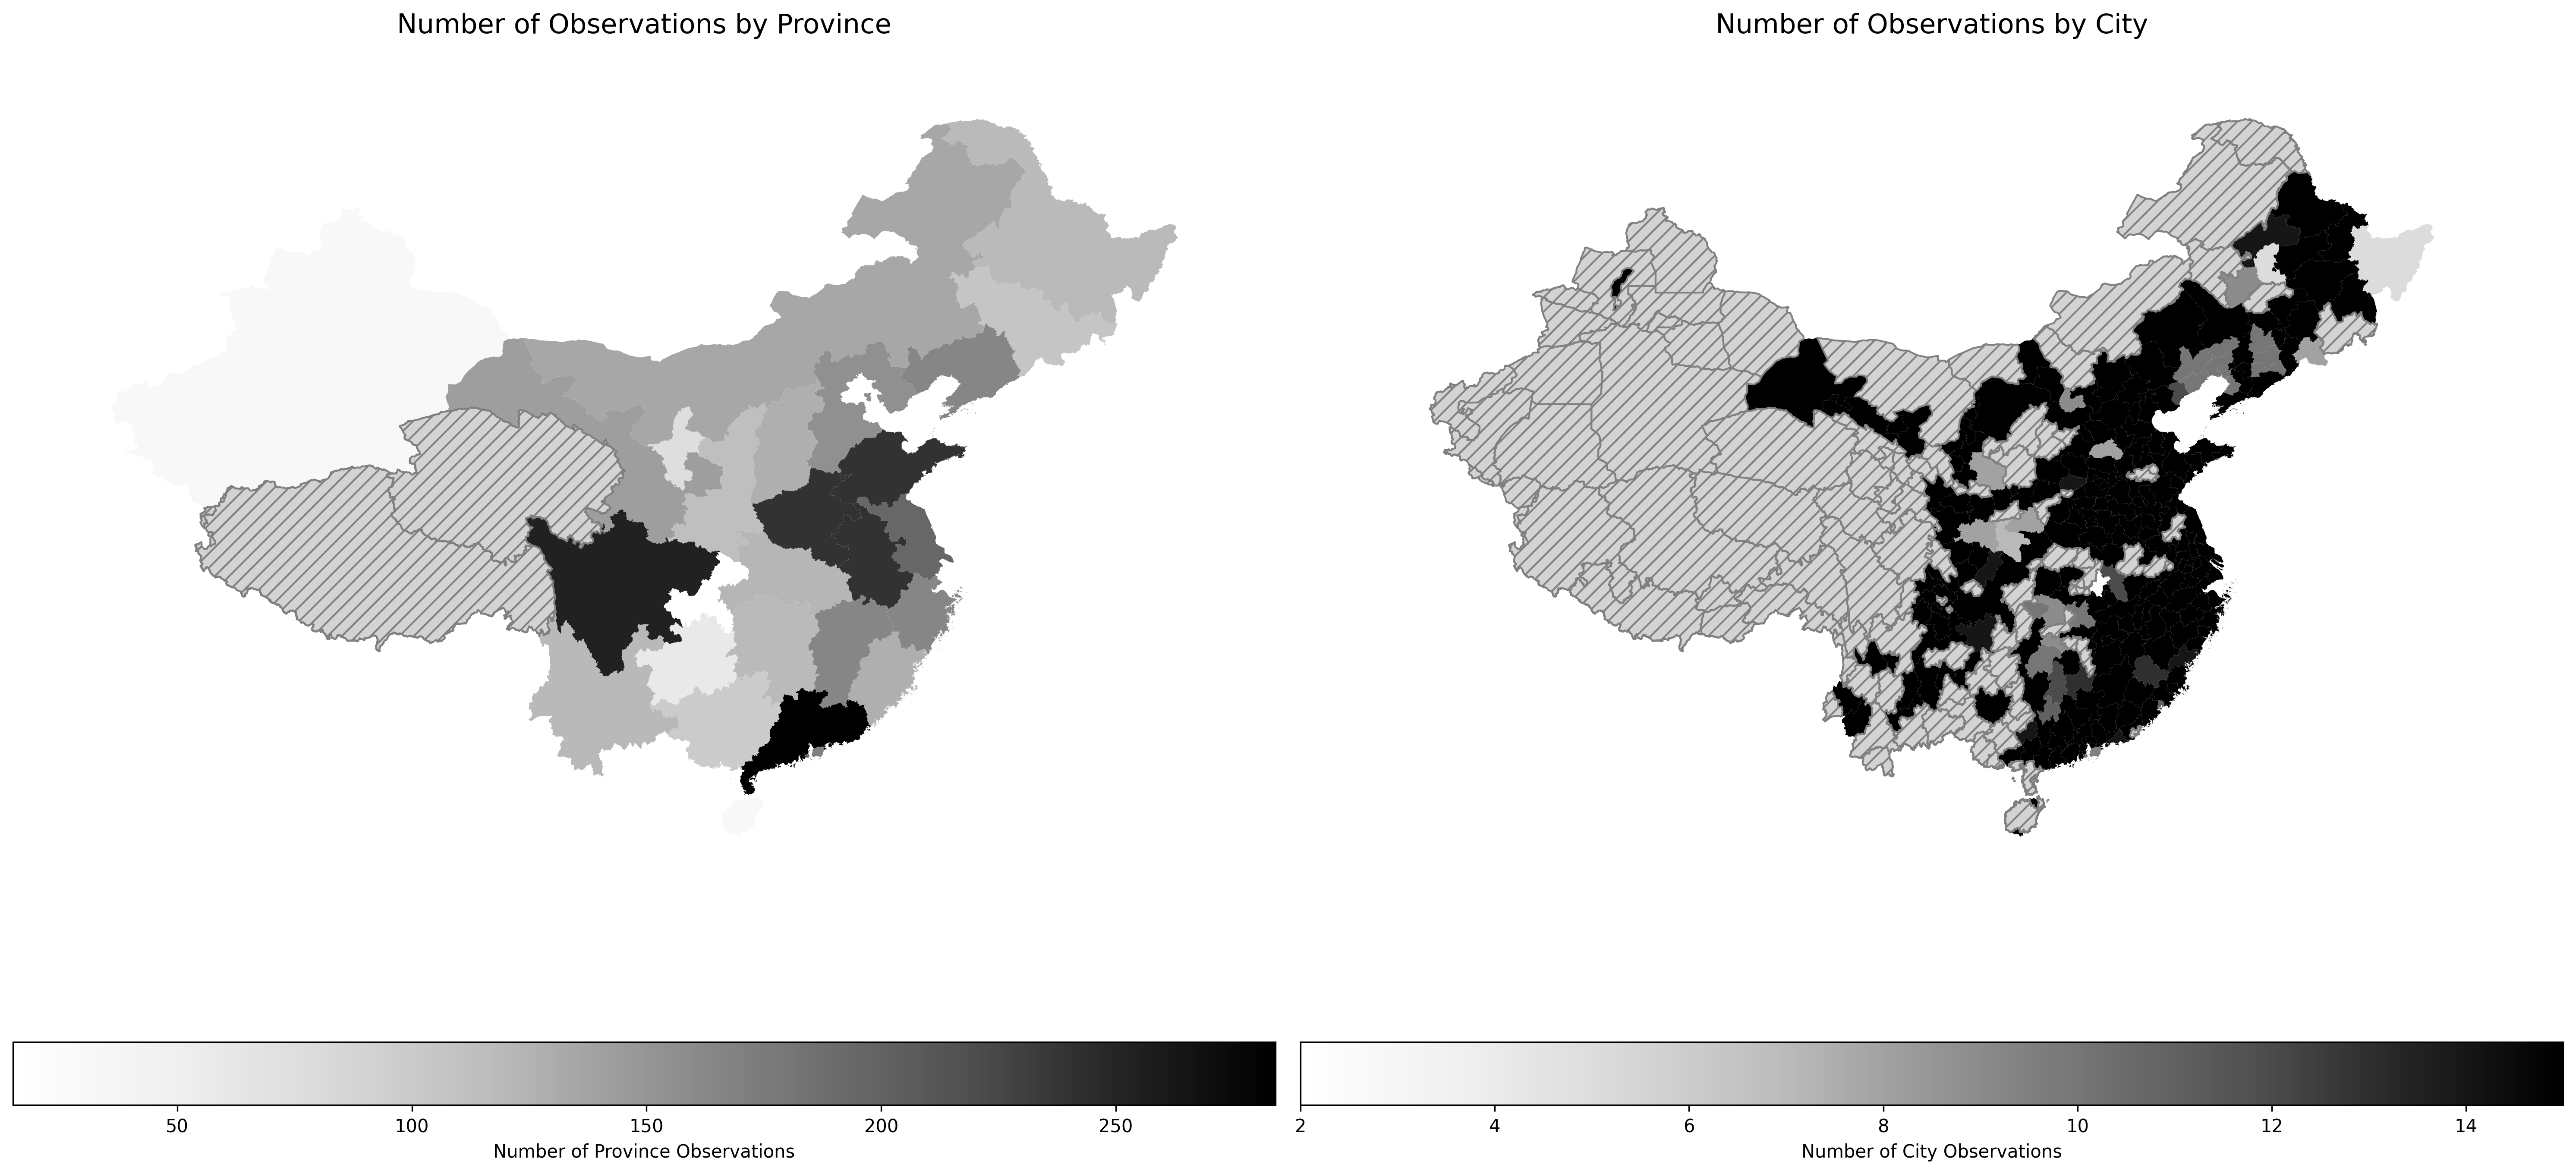

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), dpi=300)

china_map_with_pop.plot(column='Count', ax=ax1, legend=True, missing_kwds={
                        'color': 'lightgrey',
                        'edgecolor': 'grey',
                        'hatch': '///',
                        'label': 'Missing data'},
                        cmap='Greys',  # This changes the color scheme
                        legend_kwds={'label': "Number of Province Observations",
                                     'orientation': "horizontal"})

city_map.plot(column='Count', ax=ax2, legend=True, missing_kwds={
                        'color': 'lightgrey',
                        'edgecolor': 'grey',
                        'hatch': '///',
                        'label': 'Missing data'},
                        cmap='Greys',  # This changes the color scheme
                        legend_kwds={'label': "Number of City Observations",
                                     'orientation': "horizontal"})

# To align titles horizontally, you can use the y parameter to set the vertical position
ax1.set_title('Number of Observations by Province', fontsize=15, y=1.05)
ax2.set_title('Number of Observations by City', fontsize=15, y=1.05)

# Turn off the axes
ax1.set_axis_off()
ax2.set_axis_off()

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # Adjust bottom to make space for the legend

plt.show()

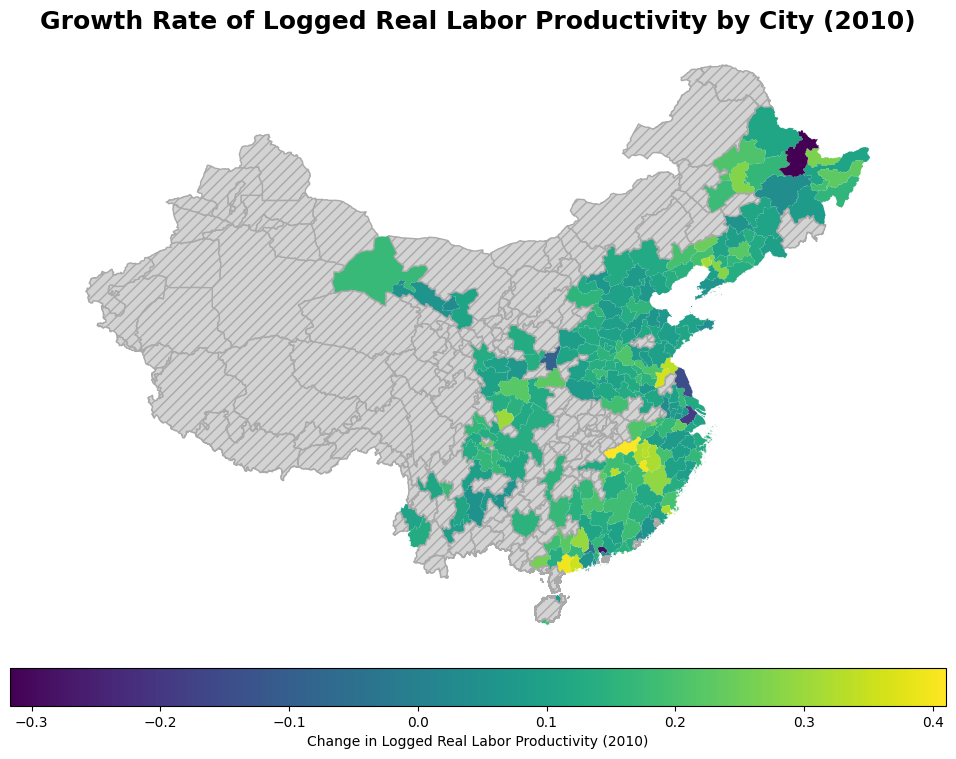

In [ ]:
# Step 1: Filter for the year 2010
dataGraph_2010 = datat[datat['Year'] == 2010]

# Step 2: Merge data
merged_gdatat = china_map2.merge(dataGraph_2010, how='left', left_on=['NAME_1', 'NAME_2'], right_on=['Province', 'City'])

# Step 3: Plot the map with professional enhancements
fig, ax = plt.subplots(1, figsize=(12, 8))
merged_gdatat.plot(column='D LN Real Labor Prod',
                   ax=ax,
                   legend=True,
                   missing_kwds={'color': 'lightgrey',
                                 'edgecolor': 'darkgrey',
                                 'hatch': '///',
                                 'label': 'Missing Data'},
                   cmap='viridis',  # A professional, perceptually uniform colormap
                   legend_kwds={'label': 'Change in Logged Real Labor Productivity (2010)',
                                'orientation': "horizontal",
                                'shrink': 0.8,
                                'aspect': 25,
                                'pad': 0.02})

# Title and aesthetics adjustments
ax.set_title('Growth Rate of Logged Real Labor Productivity by City (2010)', fontsize=18, fontweight='bold')
ax.set_axis_off()

# Optional: Add a scale bar and north arrow
# This requires the additional package contextily or mpl_toolkits, depending on your preferred method

plt.tight_layout()
plt.show()

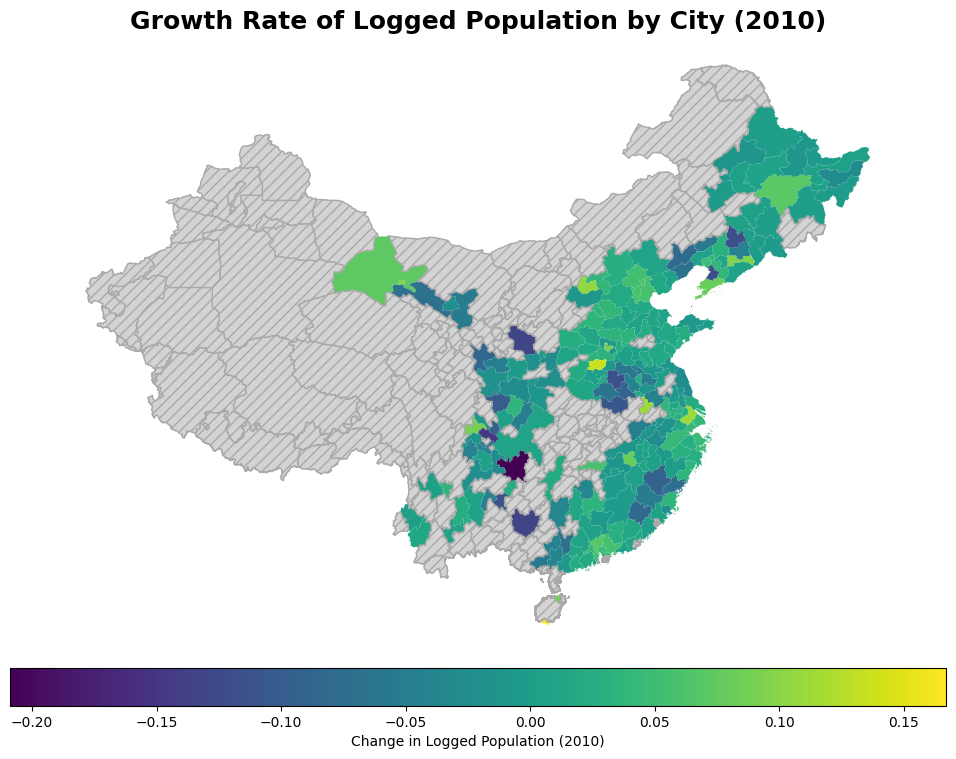

In [ ]:
# Step 1: Filter for the year 2010
dataGraph_2010 = datat[datat['Year'] == 2010]

# Step 2: Ensure that the city and province names can be used for an accurate merge
# Note: This assumes that the "Province" column in dataGraph matches "NAME_1" in china_map2,
# and "City" matches "NAME_2". Adjust if necessary.
merged_gdatat = china_map2.merge(dataGraph_2010, how = 'left', left_on=['NAME_1', 'NAME_2'], right_on=['Province', 'City'])

# Step 3: Plot the map
# Note: You might need to adjust the figsize depending on your display
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_gdatat.plot(column='D LN Pop', ax=ax,
                   legend=True,
                   missing_kwds={'color': 'lightgrey',
                                 'edgecolor': 'darkgrey',
                                 'hatch': '///',
                                 'label': 'Missing Data'},
                   cmap='viridis',  # A professional, perceptually uniform colormap
                   legend_kwds={'label': 'Change in Logged Population (2010)',
                                'orientation': "horizontal",
                                'shrink': 0.8,
                                'aspect': 25,
                                'pad': 0.02})

# Title and aesthetics adjustments
ax.set_title('Growth Rate of Logged Population by City (2010)', fontsize=18, fontweight='bold')
ax.set_axis_off()

# Optional: Add a scale bar and north arrow
# This requires the additional package contextily or mpl_toolkits, depending on your preferred method

plt.tight_layout()
plt.show()

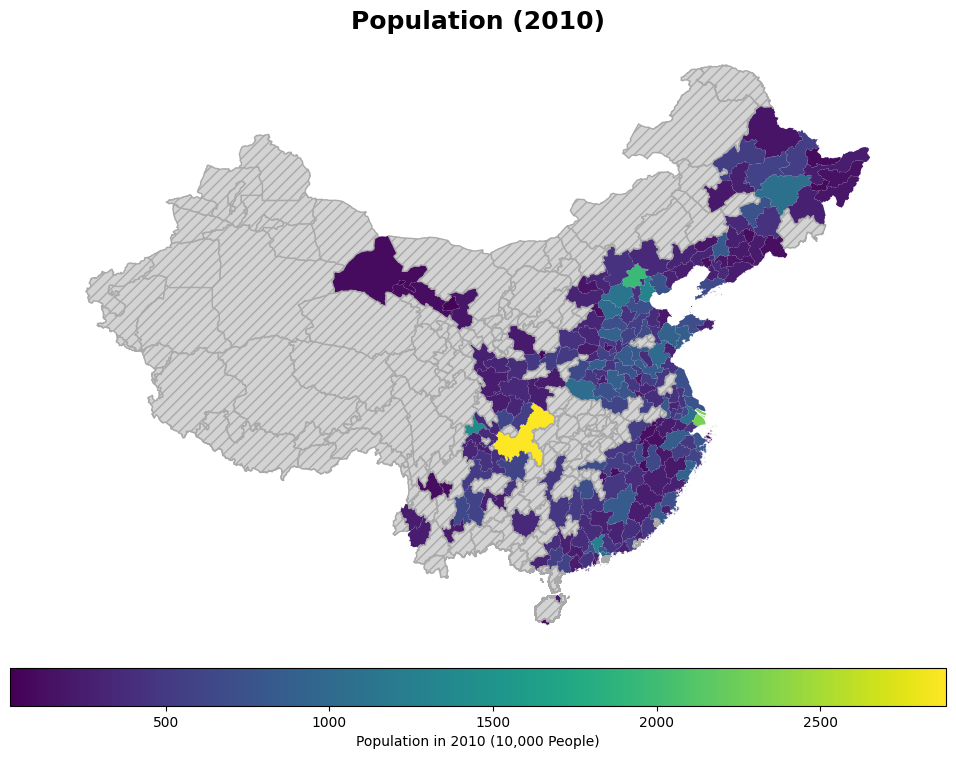

In [ ]:
# Step 1: Filter for the year 2010
dataGraph_2010 = datat[datat['Year'] == 2010]

# Step 2: Merge data
merged_gdatat = china_map2.merge(dataGraph_2010, how='left', left_on=['NAME_1', 'NAME_2'], right_on=['Province', 'City'])

# Step 3: Plot the map with professional enhancements
fig, ax = plt.subplots(1, figsize=(12, 8))
merged_gdatat.plot(column='Pop',
                   ax=ax,
                   legend=True,
                   missing_kwds={'color': 'lightgrey',
                                 'edgecolor': 'darkgrey',
                                 'hatch': '///',
                                 'label': 'Missing Data'},
                   cmap='viridis',  # A professional, perceptually uniform colormap
                   legend_kwds={'label': 'Population in 2010 (10,000 People)',
                                'orientation': "horizontal",
                                'shrink': 0.8,
                                'aspect': 25,
                                'pad': 0.02})

# Title and aesthetics adjustments
ax.set_title('Population (2010)', fontsize=18, fontweight='bold')
ax.set_axis_off()

# Optional: Add a scale bar and north arrow
# This requires the additional package contextily or mpl_toolkits, depending on your preferred method

plt.tight_layout()
plt.show()

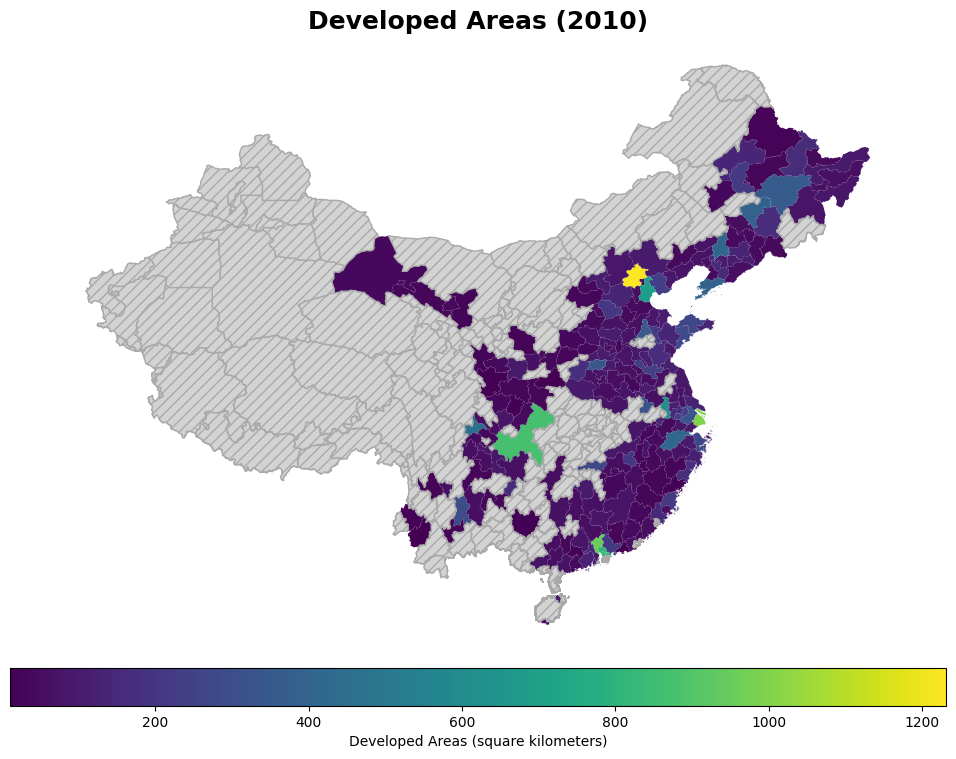

In [ ]:
# Step 1: Filter for the year 2010
dataGraph_2010 = datat[datat['Year'] == 2010]

# Step 2: Merge data
merged_gdatat = china_map2.merge(dataGraph_2010, how='left', left_on=['NAME_1', 'NAME_2'], right_on=['Province', 'City'])

# Step 3: Plot the map with professional enhancements
fig, ax = plt.subplots(1, figsize=(12, 8))
merged_gdatat.plot(column='Developed Areas',
                   ax=ax,
                   legend=True,
                   missing_kwds={'color': 'lightgrey',
                                 'edgecolor': 'darkgrey',
                                 'hatch': '///',
                                 'label': 'Missing Data'},
                   cmap='viridis',  # A professional, perceptually uniform colormap
                   legend_kwds={'label': 'Developed Areas (square kilometers)',
                                'orientation': "horizontal",
                                'shrink': 0.8,
                                'aspect': 25,
                                'pad': 0.02})

# Title and aesthetics adjustments
ax.set_title('Developed Areas (2010)', fontsize=18, fontweight='bold')
ax.set_axis_off()

# Optional: Add a scale bar and north arrow
# This requires the additional package contextily or mpl_toolkits, depending on your preferred method

plt.tight_layout()
plt.show()

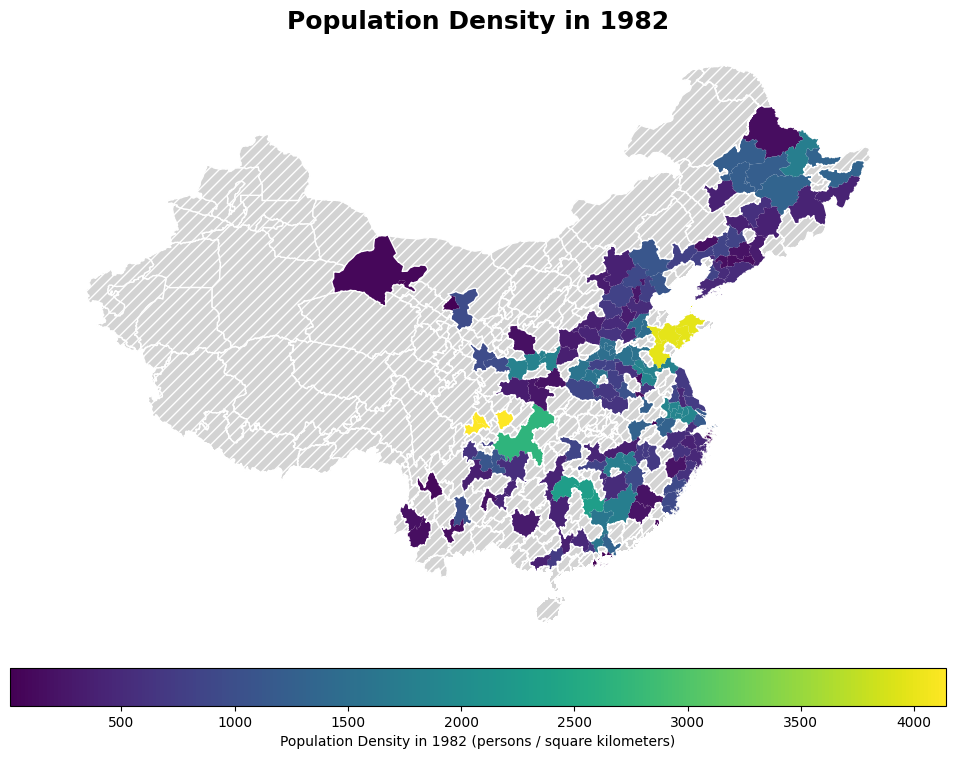

In [ ]:
# Step 1: Filter for the year 2010
dataGraph_2010 = datat[datat['Year'] == 2010]
dataGraph_2010 = oldPop
# Step 2: Merge data
merged_gdatat = china_map2.merge(dataGraph_2010, how='left', left_on=['NAME_1', 'NAME_2'], right_on=['Province', 'City'])

# Step 3: Plot the map with professional enhancements
fig, ax = plt.subplots(1, figsize=(12, 8))
merged_gdatat.plot(column='OldPop',
                   ax=ax,
                   legend=True,
                   missing_kwds={'color': 'lightgrey',
                                 'edgecolor': 'white',
                                 'hatch': '///',
                                 'label': 'Missing Data'},
                   cmap='viridis',  # A professional, perceptually uniform colormap
                   legend_kwds={'label': 'Population Density in 1982 (persons / square kilometers)',
                                'orientation': "horizontal",
                                'shrink': 0.8,
                                'aspect': 25,
                                'pad': 0.02})

# Title and aesthetics adjustments
ax.set_title('Population Density in 1982', fontsize=18, fontweight='bold')
ax.set_axis_off()

# Optional: Add a scale bar and north arrow
# This requires the additional package contextily or mpl_toolkits, depending on your preferred method

plt.tight_layout()
plt.show()